# 프로젝트 개요

**다음 분기에 어떤 게임을 설계해야 할까? 라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.**

# Data Description



* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

# 프로젝트 목표

**다음 분기에 어떤 게임을 설계해야 할까?를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.(설명을 듣는 사람은 비데이터 직군이라고 가정합니다.)**

# 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
df.dropna(inplace = True)
del df['Unnamed: 0']

In [4]:
# 데이터 셋 reset 함수
def resetindex(data):
  data.reset_index(inplace = True)

In [5]:
# 인덱스 재정렬
resetindex(df)

In [6]:
# 인덱스 정리
df.drop(['index'], axis = 1, inplace = True)

In [ ]:
df.head(35)

In [8]:
df.shape

(16241, 9)

**연도 표기가 제대로 되지않은 부분을 처리해주었습니다.**

In [ ]:
year = pd.DataFrame(df['Year'].value_counts())
year.reset_index(inplace = True)
year['index'] = year['index'].astype('int64')
year.columns = ['Year', 'Game_counts']

for i in range(0, len(year)):
  if year['Year'][i] < 60: year['Year'][i] += 2000
  elif 60 <= year['Year'][i] < 100: year['Year'][i] += 1900

for i in range(0, len(df['Year'])):
  if df['Year'][i] < 60: df['Year'][i] += 2000
  elif 60 <= df['Year'][i] < 100: df['Year'][i] += 1900

year = year.groupby('Year').sum()
year.reset_index(inplace = True)
df['Year'] = df['Year'].astype('int64')
year # 년도별 게임 출시 개수

In [11]:
df['Year'] = df['Year'].astype('str')

# 출고량간의 상관관계

In [25]:
# 지역별로 출고량이 얼마나 상관관계를 가지는지 보여줌
corr_df = df.corr()
s = corr_df.unstack() # unstack를 활용하여 매트릭스가 아닌 Series 형태로 표현할 수 있다.
df1 = pd.DataFrame(s[s<1].sort_values(ascending = False), columns = ['Sales'])
df1.style.background_gradient(cmap = 'viridis')

**북아메리카 지역과 유럽은 76%정도의 상관관계를 보이고 있으며 공통되는 부분이 많은 것이라고 추정합니다. 그리고 년도는 출고량에 미치는 영향이 매우 적은 것으로 파악됩니다.**

In [12]:
def change(data):
  for i in range(0, len(data)):
    if 'M' in data[i]:
      data[i] = data[i].replace('M', '')
    elif 'K' in data[i]:
      data[i] = data[i].replace('K', '')
      data[i] = float(data[i]) / 1000

change(df['NA_Sales'])
change(df['EU_Sales'])
change(df['JP_Sales'])
change(df['Other_Sales'])

In [13]:
# 출고량 데이터 단위를 맞추고 float형으로 변환
df['EU_Sales'] = df['EU_Sales'].astype('float64')
df['NA_Sales'] = df['NA_Sales'].astype('float64')
df['JP_Sales'] = df['JP_Sales'].astype('float64')
df['Other_Sales'] = df['Other_Sales'].astype('float64')

In [14]:
# 출고량 데이터에서 0인 데이터 제외
EU_not_Z = df[df.EU_Sales > 0]
NA_not_Z = df[df.NA_Sales > 0]
JP_not_Z = df[df.JP_Sales > 0]
Other_not_Z = df[df.Other_Sales > 0]

In [15]:
# 각 지역별 출고량의 총합
NA_not_Z['NA_Sales'].sum()
EU_not_Z['EU_Sales'].sum()
JP_not_Z['JP_Sales'].sum()
Other_not_Z['Other_Sales'].sum()
NA_not_Z.value_counts(['Genre'])

Genre       
Action          2516
Sports          1812
Misc            1159
Shooter         1121
Racing          1082
Role-Playing     848
Platform         790
Simulation       604
Fighting         584
Adventure        536
Puzzle           435
Strategy         333
dtype: int64

# 그동안 출시된 게임의 장르

**게임의 장르를 통합하여 그래프로 표현하였습니다.**

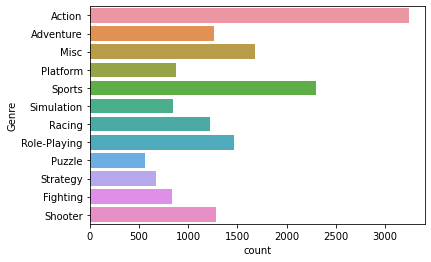

In [16]:
# # x축의 Genre 값을 겹치지않고 보일수 있게 돌려줌
# ax1.tick_params(axis = 'x', labelrotation = 45)
# ax2.tick_params(axis = 'x', labelrotation = 45)
# ax4.tick_params(axis = 'x', labelrotation = 45)
# ax5.tick_params(axis = 'x', labelrotation = 45)

# 그동안 출시된 게임의 장르 그래프
sns.countplot(data = df, y = 'Genre');
plt.show()

# 연도별 게임의 트렌드

**연도별로 게임의 출고량을 종합해 표현했습니다. 그래프에 나온 것처럼 2000년대 들어서 전체 게임의 출고량이 급등을 하였고, 주로 Action과 Sports 장르의 출고량이 많았습니다.**

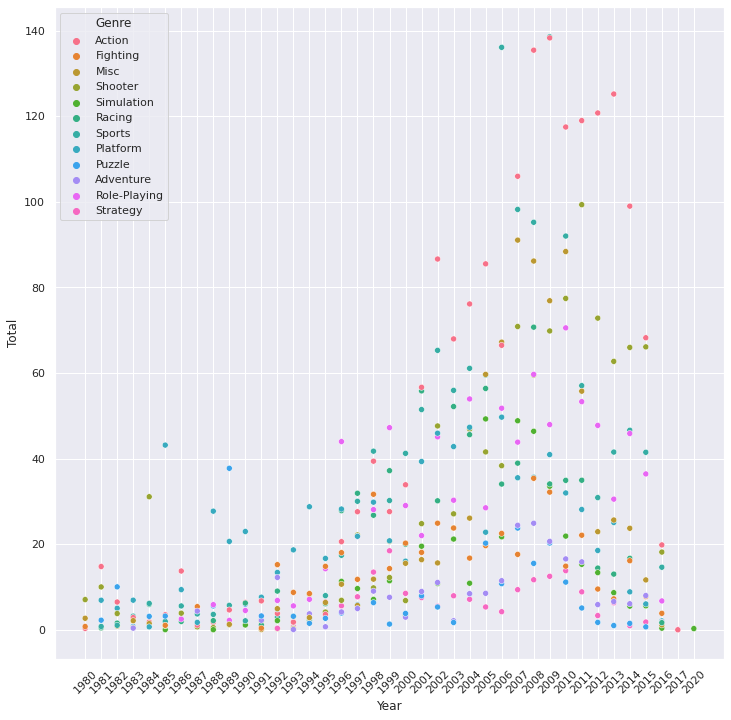

In [17]:
year_sales = df[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
year_sales = year_sales.groupby(['Year', 'Genre']).sum().reset_index().sort_values(by = 'Year')
year_sales_total = year_sales.set_index(['Year', 'Genre']).sum(axis = 1).reset_index()
year_sales_total.rename(columns = {0 : 'Total'}, inplace = True)

# 연도별 게임의 트렌드
sns.set(rc = {'figure.figsize': (12, 12)})
plt.tick_params(axis = 'x', labelrotation = 45)
sns.scatterplot(data = year_sales_total, x = 'Year', y = 'Total', hue = 'Genre');

# 출고량이 높은 게임에 대한 분석과 그에 따른 지역마다 선호하는 장르

**출고량이 높다는 기준을 각 지역별로 평균과 표준편차를 더한 값을 사용하였으면 그 값은 대체로 10억을 웃돌았습니다.**

In [18]:
# # columns에 최대값 행 추출
# df_sample = df.loc[df['NA_Sales'].idxmax()]
# df_sample.reset_index().T

# 해당되는 지역을 제외한 나머지 columns 삭제
only_NA = NA_not_Z.copy()
only_NA.drop(columns = ['EU_Sales', 'JP_Sales', 'Other_Sales'], inplace = True)

only_EU = EU_not_Z.copy()
only_EU.drop(columns = ['NA_Sales', 'JP_Sales', 'Other_Sales'], inplace = True)

only_JP = JP_not_Z.copy()
only_JP.drop(columns = ['EU_Sales', 'NA_Sales', 'Other_Sales'], inplace = True)

only_Other = Other_not_Z.copy()
only_Other.drop(columns = ['EU_Sales', 'JP_Sales', 'NA_Sales'], inplace = True)

# 평균과 표준편차를 더한 값 이상의 출고량이 높다고 판단
NA_high = only_NA[only_NA['NA_Sales'] > (only_NA['NA_Sales'].mean() + only_NA['NA_Sales'].std())]
EU_high = only_EU[only_EU['EU_Sales'] > (only_EU['EU_Sales'].mean() + only_EU['EU_Sales'].std())]
JP_high = only_JP[only_JP['JP_Sales'] > (only_JP['JP_Sales'].mean() + only_JP['JP_Sales'].std())]
Other_high = only_Other[only_Other['Other_Sales'] > (only_Other['Other_Sales'].mean() + only_Other['Other_Sales'].std())]

**NA지역에서는 주로 X360이나 Will, PS2 같은 플랫폼 게임의 출고량이 많았고, 장르 부문에서는 Shooter과 Action, Platform, Sports순으로 출고량이 많았습니다.** 

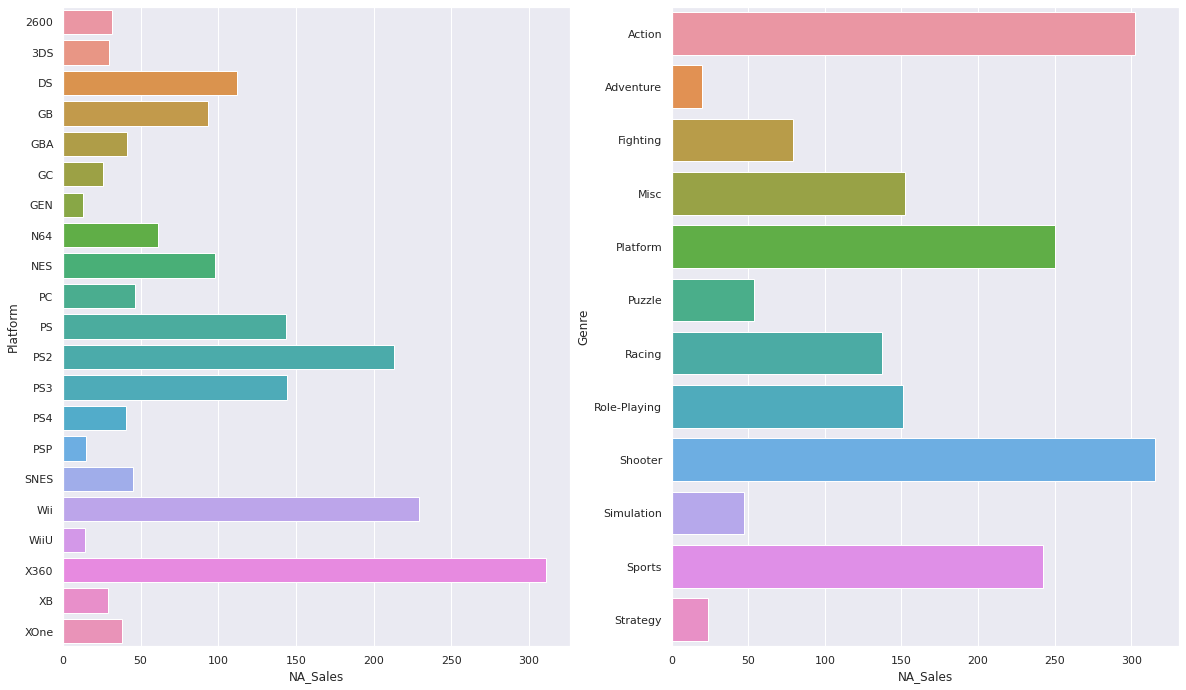

In [19]:
NA_high.sort_values(by = ['NA_Sales'], ascending=False)
# # NA지역의 장르와 플랫폼 출고량의 합계
NA_Platform = NA_high.groupby(['Platform'], as_index = False).sum()
NA_Genre = NA_high.groupby(['Genre'], as_index = False).sum()

fig = plt.figure(figsize = (20,40))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)

sns.barplot(data = NA_Platform, x = 'NA_Sales', y = 'Platform', ax = ax1);
sns.barplot(data = NA_Genre, x = 'NA_Sales', y = 'Genre', ax = ax2);
plt.show()

**EU지역에서는 NA지역과 비슷하게 Will이나 PS3나 2, X360 플랫폼의 게임이 출고량이 높았으며, 장르부문에서는 Action, Sports, Shooter가 출고량이 높았습니다.**

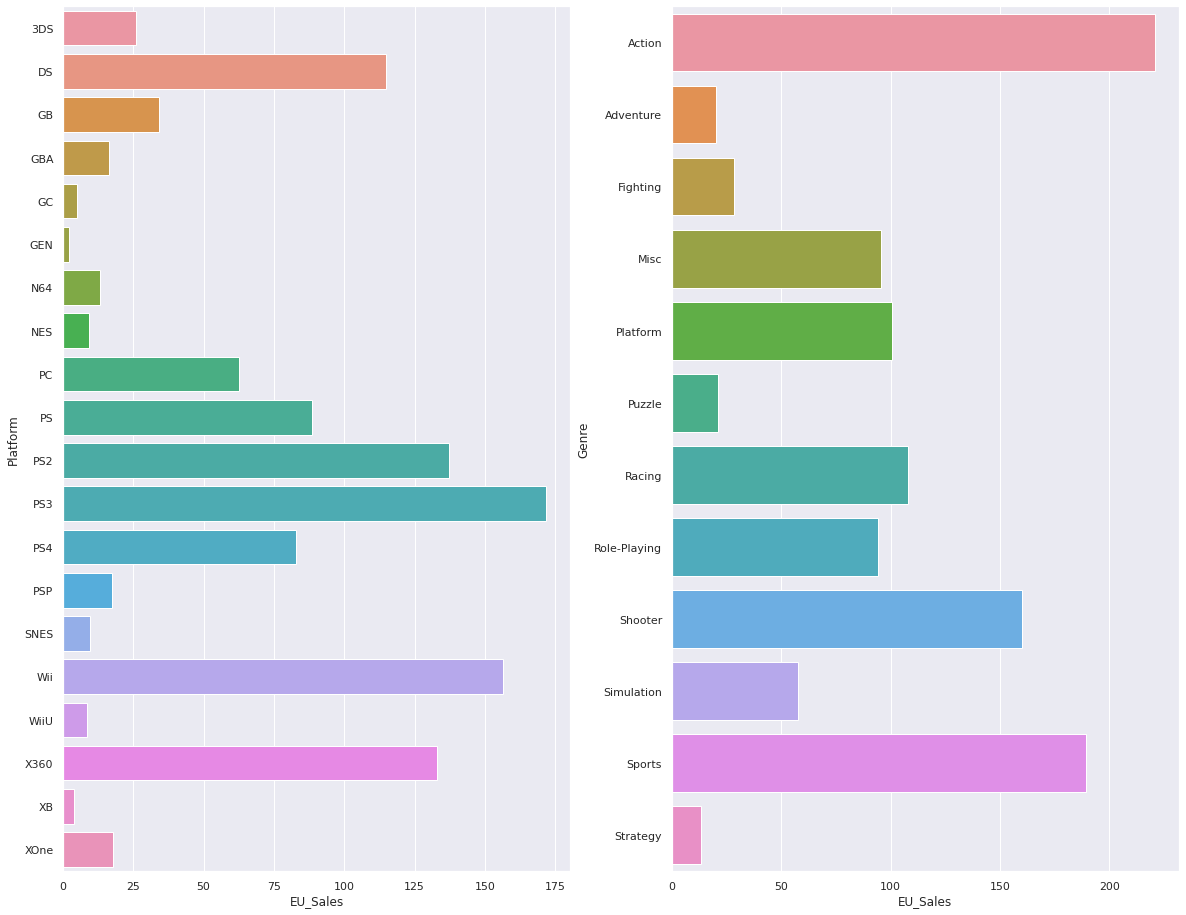

In [20]:
# EU지역의 장르와 플랫폼 출고량의 합계
EU_Platform = EU_high.groupby(['Platform'], as_index = False).sum()
EU_Genre = EU_high.groupby(['Genre'], as_index = False).sum()

fig = plt.figure(figsize = (20,35))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.barplot(data = EU_Platform, x = 'EU_Sales', y = 'Platform', ax = ax1);
sns.barplot(data = EU_Genre, x = 'EU_Sales', y = 'Genre', ci = None, ax = ax2);
plt.show()

**JP지역에서는 Nintendo DS와 NES 플랫폼 게임의 출고량이 높았고, 장르부문에서는 압도적으로 Role-Playing가 출고량이 높았습니다.**

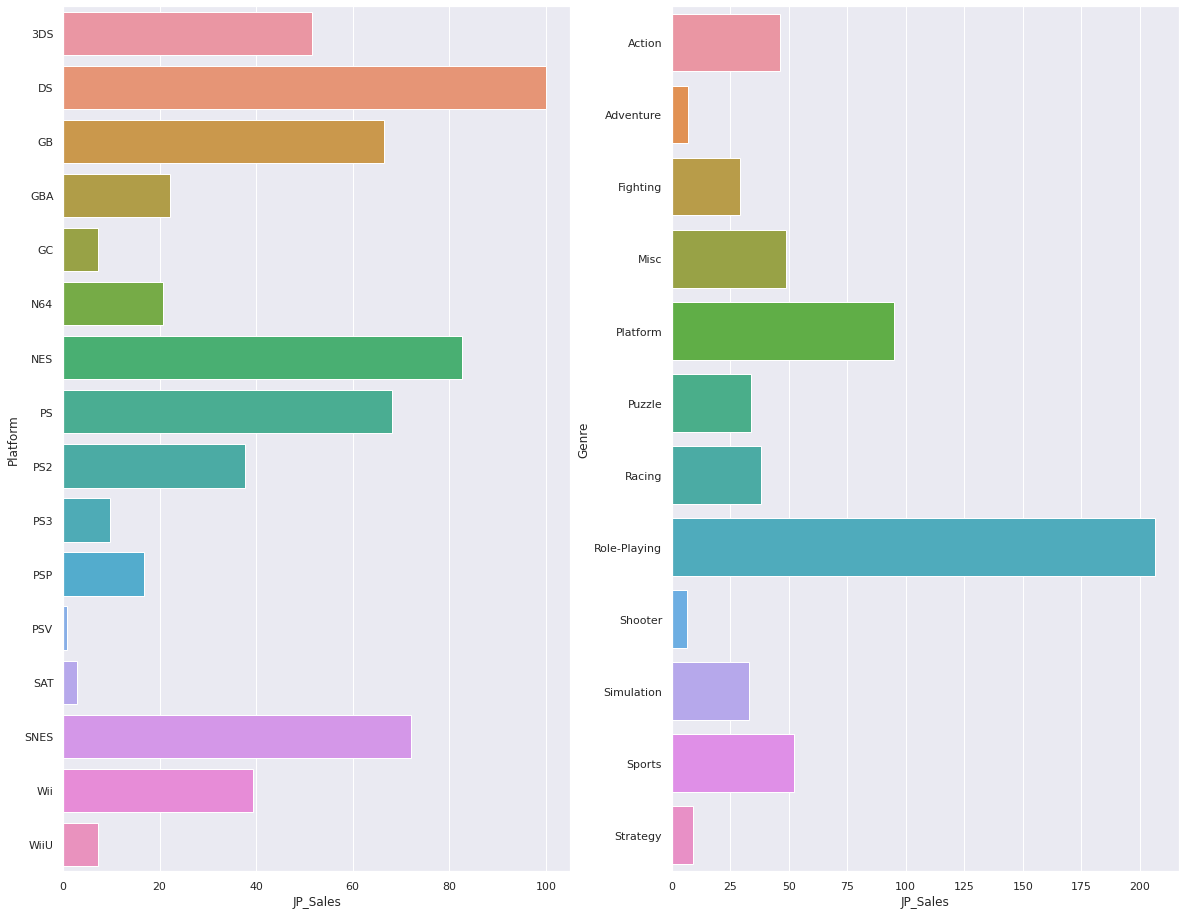

In [21]:
# JP지역의 장르와 플랫폼 출고량의 합계
JP_Platform = JP_high.groupby(['Platform'], as_index = False).sum()
JP_Genre = JP_high.groupby(['Genre'], as_index = False).sum()

fig = plt.figure(figsize = (20,35))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.barplot(data = JP_Platform, x = 'JP_Sales', y = 'Platform', ax = ax1);
sns.barplot(data = JP_Genre, x = 'JP_Sales', y = 'Genre', ax = ax2);
plt.show()

**기타지역에서는 PS 플랫폼의 출고량이 높았으며, Action이나 Sports 같은 장르가 출고량이 높았습니다.**

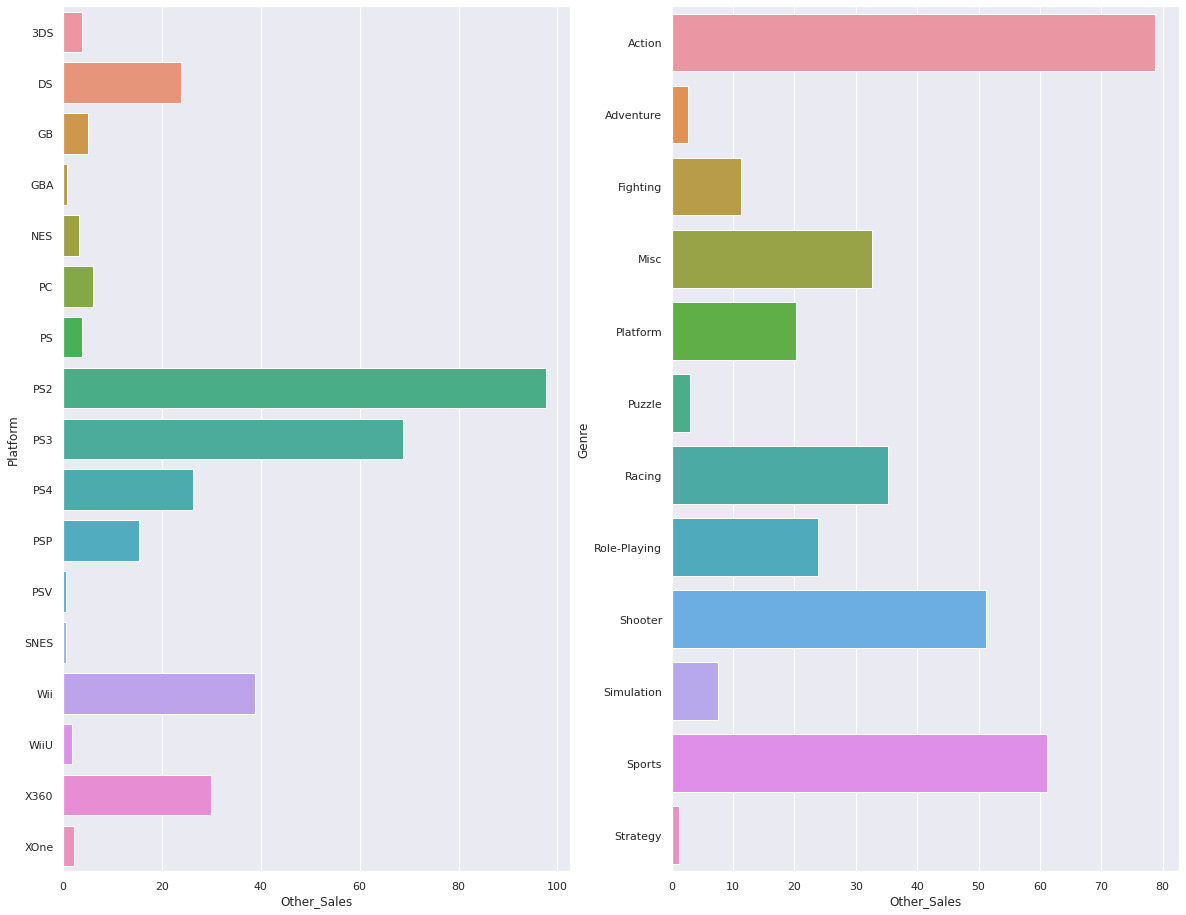

In [22]:
# Other지역의 장르와 플랫폼 출고량의 합계
Other_Platform = Other_high.groupby(['Platform'], as_index = False).sum()
Other_Genre = Other_high.groupby(['Genre'], as_index = False).sum()

fig = plt.figure(figsize = (20,35))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.barplot(data = Other_Platform, x = 'Other_Sales', y = 'Platform', ax = ax1);
sns.barplot(data = Other_Genre, x = 'Other_Sales', y = 'Genre', ax = ax2);
plt.show()

# 전체적인 출고량과 2000년대 출고량의 비교

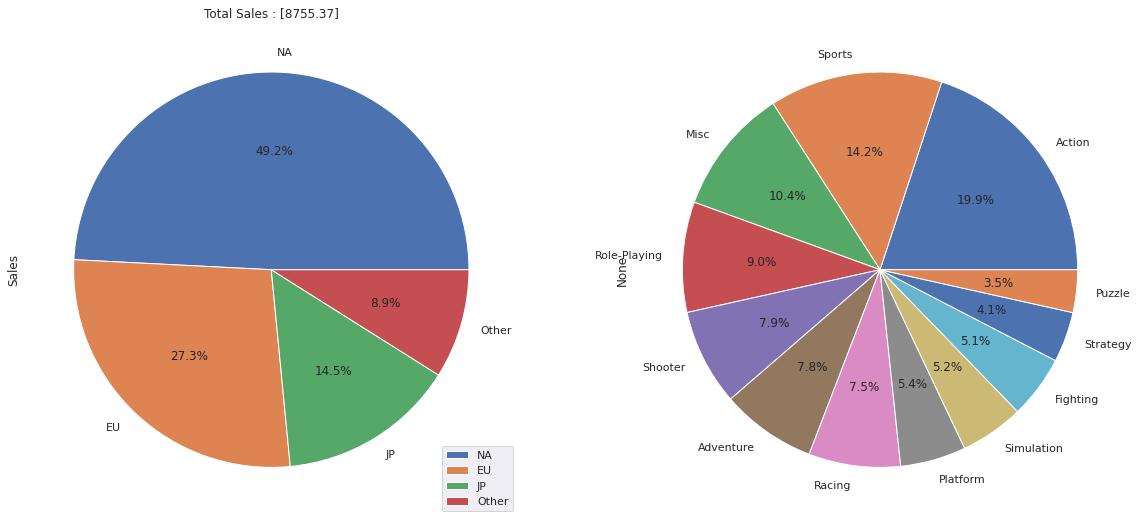

In [23]:
# 전체 출고량에서 각 지역별 출고량 비율
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

Total_Sales = pd.DataFrame({'Sales' :[only_NA['NA_Sales'].sum(), only_EU['EU_Sales'].sum(), only_JP['JP_Sales'].sum(), only_Other['Other_Sales'].sum()]},
                            index = ['NA', 'EU', 'JP', 'Other'])

Total_Sales.plot.pie(y = 'Sales', autopct = '%.1f%%', ax = ax1); # autopct : 백분율로 나눠서 표기해줌
ax1.set(title = f'Total Sales : {Total_Sales.sum().values}')
df.value_counts('Genre').plot.pie(y = 'Genre', autopct = '%.1f%%', ax = ax2);

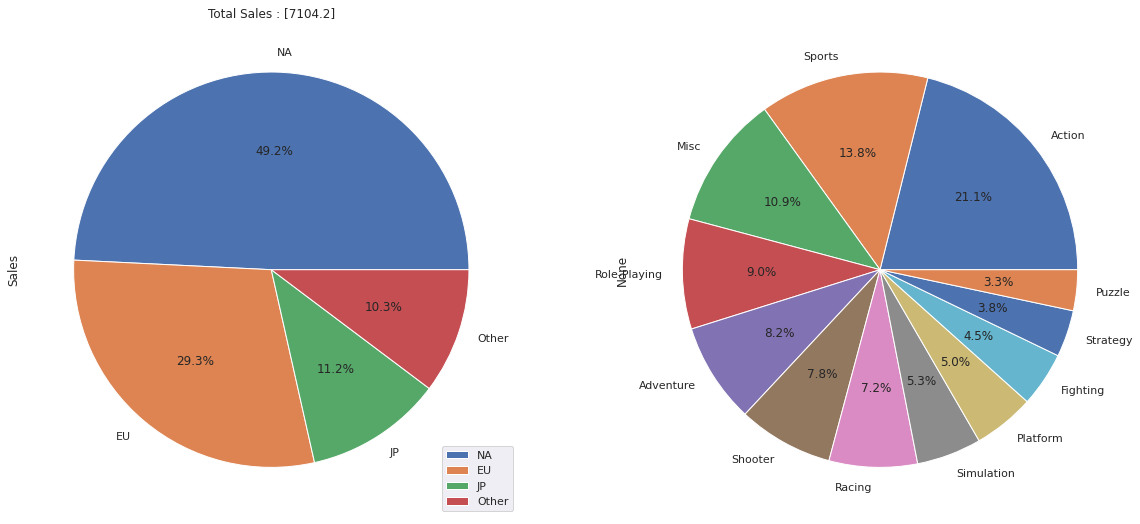

In [26]:
# 2000년도 이후 데이터만 추출
df['Year'] = df['Year'].astype('int64')
df_20s = df[df['Year'] > 1999]

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

Total_Sales = pd.DataFrame({'Sales' :[df_20s['NA_Sales'].sum(), df_20s['EU_Sales'].sum(), df_20s['JP_Sales'].sum(), df_20s['Other_Sales'].sum()]},
                            index = ['NA', 'EU', 'JP', 'Other'])
Total_Sales.plot.pie(y = 'Sales', autopct = '%.1f%%', ax = ax1);
ax1.set(title = f'Total Sales : {Total_Sales.sum().values}')
df_20s.value_counts('Genre').plot.pie(y = 'Genre', autopct = '%.1f%%', ax = ax2);

# 결론

**출고량의 많은 부분을 NA지역과 EU지역이 차지하고 있으며 그 둘의 상관관계도 76%로 높은 편이기 때문에 동시에 만족할 수 있는 Action이나 Sports 같은 장르의 Console 게임을 설계하는 것이 좋다고 생각됩니다.**